## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

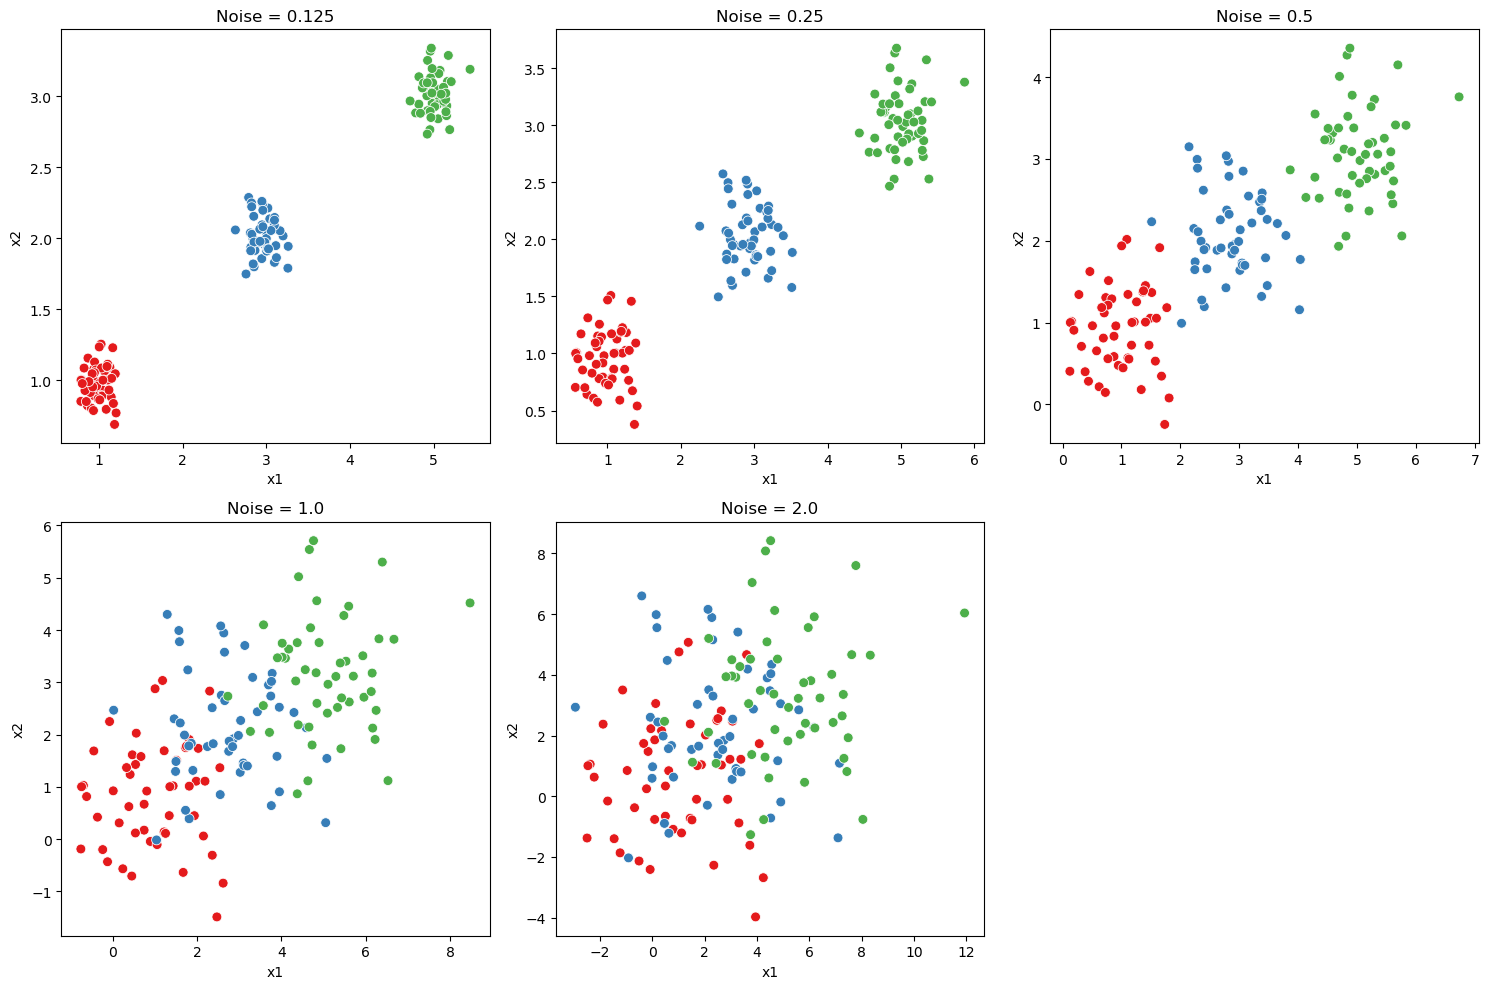

In [2]:
#2. 
import matplotlib.pyplot as plt
import seaborn as sns
#listing them again so its easier to loop thro and plot
datasets = [
    (df0_125, "Noise = 0.125"),
    (df0_25, "Noise = 0.25"),
    (df0_5, "Noise = 0.5"),
    (df1_0, "Noise = 1.0"),
    (df2_0, "Noise = 2.0")
]
plt.figure(figsize=(15, 10))
for i, (df, title) in enumerate(datasets, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x="x1", y="x2", hue="group", palette="Set1", s=50)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend().remove()
plt.tight_layout()
plt.show()

As noise increases, clusters become more spread out and over lap which reduces visual separation. This makes it harder to identify the true number of clusters.

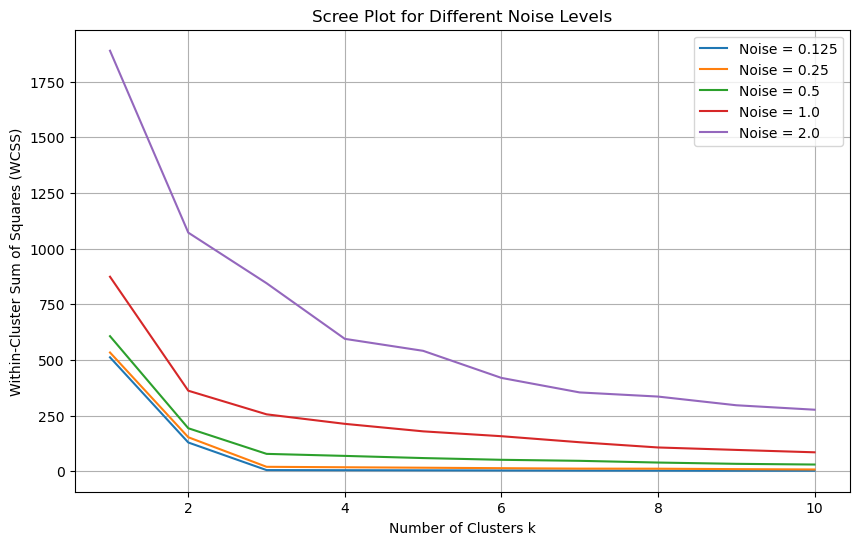

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def compute_wcss(df, k_max=10):
    wcss = []
    X = df[['x1', 'x2']].values
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

# gets the WCSS for each dataset
wcss_0125 = compute_wcss(df0_125)
wcss_025 = compute_wcss(df0_25)
wcss_05 = compute_wcss(df0_5)
wcss_10 = compute_wcss(df1_0)
wcss_20 = compute_wcss(df2_0)

# Plot all scree plots on the same canvas
plt.figure(figsize=(10, 6))
ks = range(1, 11)
plt.plot(ks, wcss_0125, label='Noise = 0.125')
plt.plot(ks, wcss_025, label='Noise = 0.25')
plt.plot(ks, wcss_05, label='Noise = 0.5')
plt.plot(ks, wcss_10, label='Noise = 1.0')
plt.plot(ks, wcss_20, label='Noise = 2.0')

plt.xlabel('Number of Clusters k')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Scree Plot for Different Noise Levels')
plt.legend()
plt.grid(True)
plt.show()


As the noise level increases, the scree plot elbow becomes less clear. For low noise datasets (0.125, 0.25), there’s a sharp drop in WCSS at k=3, which makes the elbow easy to spot and helps clearly identify the correct number of clusters. As noise increases (0.5, 1.0), the drop becomes more gradual and the elbow is harder to see. At the highest noise level (2.0), the plot looks almost linear making it really hard to tell where the elbow is or what k to choose. 

4.
The elbow shows where adding more clusters stops giving big improvements. In this example, when noise is low, WCSS drops sharply until k = 3 and then flattens out. That sharp bend is the elbow which tells us 3 is the right number of clusters. When noise gets higher we know that the drop will be more gradual, so the elbow becomes harder to spot which makes it harder to pick the best k.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [7]:
import pandas as pd
df = pd.read_csv('./data/2022 election cycle fundraising.csv')

#cleaning to get rid of any NA's and prevent errors
dollar_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
for col in dollar_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).replace('N/A', '0')
    df[col] = pd.to_numeric(df[col], errors='coerce')


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/var/folders/pm/fr4p6g5x33s7jjzlf3w9_hpm0000gn/T/ipykernel_78370/2063602564.py:7: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace('[\$,]', '', regex=True).replace('N/A', '0')


We normalize to make Raised and Spent comparable. The elbow in the scree plot helps us pick what the best k is. Scatter plot shows cluster patterns.

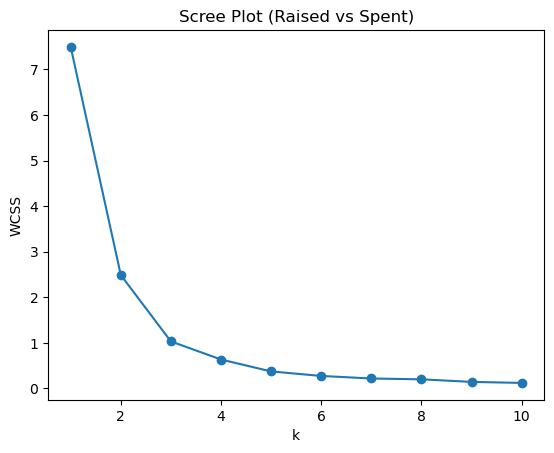

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

scaler = MinMaxScaler()
X1 = scaler.fit_transform(df[['Raised', 'Spent']])
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Scree Plot (Raised vs Spent)')
plt.show()

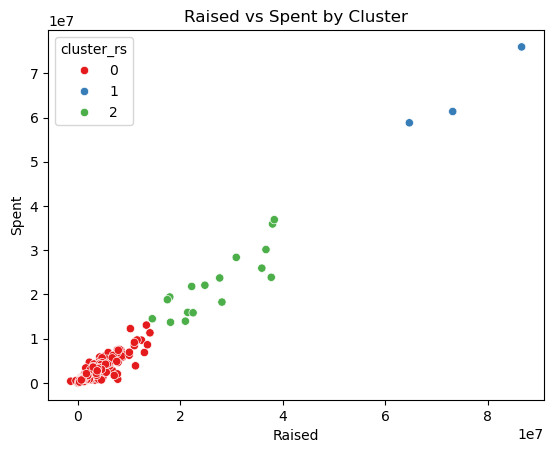

,Member,Raised,Spent
340,Mark Kelly,73140886,61357281
417,Raphael Warnock,86581469,75959810
523,Val Demings,64682883,58806664


In [11]:
#2
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster_rs'] = kmeans.fit_predict(X1)

sns.scatterplot(data=df, x='Raised', y='Spent', hue='cluster_rs', palette='Set1')
plt.title('Raised vs Spent by Cluster')
plt.show()

# Look at smallest clusters
df['cluster_rs'].value_counts()
df[df['cluster_rs'] == df['cluster_rs'].value_counts().idxmin()][['Member', 'Raised', 'Spent']]

The scree plot shows a clear elbow at k=3 meaning three clusters fit the data well. The scatter plot shows one big group of low-dollar candidates, a mid-range group, and a very small group of high-dollar fundraisers. The smallest cluster includes Mark Kelly, Raphael Warnock, and Val Demings, who each raised and spent over $60 million.

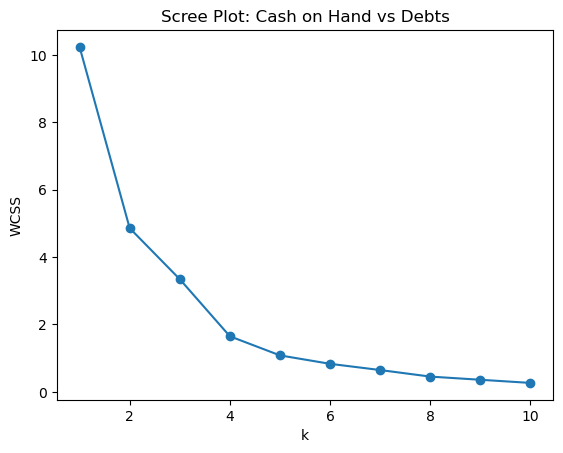

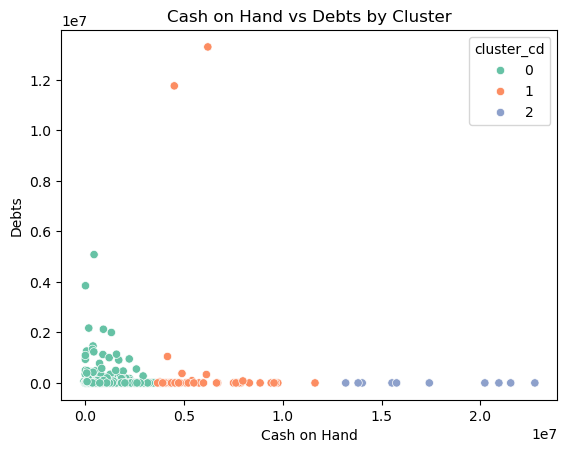

,Member,Cash on Hand,Debts
2,Adam Schiff,20942888,0
89,Chuck Schumer,20231213,0
261,John Kennedy,15530074,0
267,John Thune,17419927,0
274,Josh Gottheimer,14024163,0
290,Katie Porter,15762568,0
310,Lindsey Graham,13815515,0
340,Mark Kelly,13186127,0
417,Raphael Warnock,22762985,0
500,Tim Scott,21539824,0


In [14]:
#3 
X2 = scaler.fit_transform(df[['Cash on Hand', 'Debts']])
# starting with scree plot
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss2, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Scree Plot: Cash on Hand vs Debts')
plt.show()

# Choose k and cluster
kmeans2 = KMeans(n_clusters=3, random_state=0)
df['cluster_cd'] = kmeans2.fit_predict(X2)

sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='cluster_cd', palette='Set2')
plt.title('Cash on Hand vs Debts by Cluster')
plt.show()
# Check for the smallest clusters
df['cluster_cd'].value_counts()
df[df['cluster_cd'] == df['cluster_cd'].value_counts().idxmin()][['Member', 'Cash on Hand', 'Debts']]


The scree plot again shows an elbow at k=3 so we used 3 clusters. The smallest group includes candidates with high cash and low debt showing some strong finances at the end of the campaign. The clusters look different from Part 2 since these variables reflect how much money they had left, not how much they raised or spent.

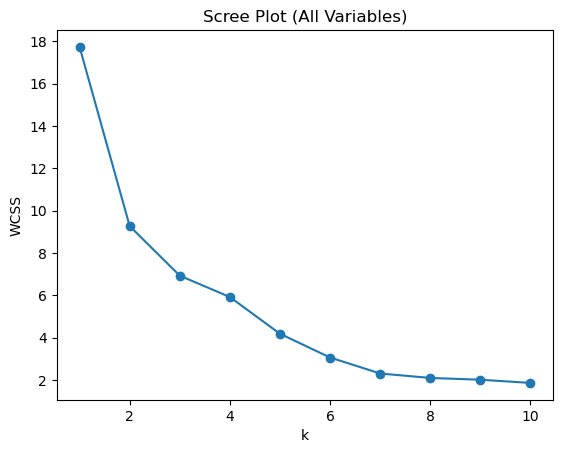

cluster_all
0    502
2     32
1      3
Name: count, dtype: int64

In [15]:
X_all = scaler.fit_transform(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])
# scree plot 
wcss_all = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_all)
    wcss_all.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_all, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Scree Plot (All Variables)')
plt.show()

# Choose k and cluster
kmeans_all = KMeans(n_clusters=3, random_state=0)
df['cluster_all'] = kmeans_all.fit_predict(X_all)
df['cluster_all'].value_counts()

4. After using all four variable the elbow still appears around k = 3 which supports our earlier choice but the smallest cluster again includes top fundraisers. The groups shifted slightly becayse the clustering reflects both campagin totals and what was left of the finances by the end of the race. The combined model gives us more complete view but blends patterns from parts 2 and 3. 

5. Yes i would say that the k means clustering algorithm did help uncover meaningful paterns. It glearly grouped candidates based on fundraising and spending habits. Raphael Warnock and Mark Kelly stood out in their own clusters as they had a lot of money. When we included Cash on Hand and Debts, new groups emerged showing who finished strong financially. Using all four variables gave the most complete picture. 

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?